In this post, we will see how to generate tabular synthetic data using Generative adversarial networks(GANs). The goal is to generate synthetic data that is similar to the actual data in terms of statistics and demographics.

## Introduction

It is important to ensure data privacy while publicly sharing information that contains sensitive information. There are numerous ways to tackle it and in this post we will use neural networks to generate synthetic data whose statistical features match the actual data.

We would be working with the Synthea dataset which is publicly available. Using the patients data from this dataset, we will try to generate synthetic data.


## Data Preprocessing



Firstly, download the publicly available synthea dataset and unzip it.

In [ ]:
!wget https://storage.googleapis.com/synthea-public/synthea_sample_data_csv_apr2020.zip
!unzip synthea_sample_data_csv_apr2020.zip

--2020-12-19 01:57:56--  https://storage.googleapis.com/synthea-public/synthea_sample_data_csv_apr2020.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8982431 (8.6M) [application/zip]
Saving to: ‘synthea_sample_data_csv_apr2020.zip’

synthea_sample_data 100%[===================>]   8.57M  27.8MB/s    in 0.3s    

2020-12-19 01:57:57 (27.8 MB/s) - ‘synthea_sample_data_csv_apr2020.zip’ saved [8982431/8982431]

Archive:  synthea_sample_data_csv_apr2020.zip
   creating: csv/
  inflating: csv/medications.csv     
  inflating: csv/providers.csv       
  inflating: csv/payer_transitions.csv  
  inflating: csv/imaging_studies.csv  
  inflating: csv/supplies.csv        
  inflating: csv/payers.csv          
  inflating: csv/allergies.csv       
  inflating: csv/procedures.csv  

### Remove unnecessary columns and encode all data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/preprocessed_DNN.csv')
df

arp.opcode  arp.hw.size  icmp.checksum  icmp.seq_le  icmp.unused  \
0               0.0          0.0            0.0          0.0          0.0   
1               0.0          0.0            0.0          0.0          0.0   
2               0.0          0.0            0.0          0.0          0.0   
3               0.0          0.0            0.0          0.0          0.0   
4               0.0          0.0            0.0          0.0          0.0   
...             ...          ...            ...          ...          ...   
1909666         0.0          0.0            0.0          0.0          0.0   
1909667         0.0          0.0            0.0          0.0          0.0   
1909668         0.0          0.0            0.0          0.0          0.0   
1909669         0.0          0.0         8644.0      13455.0          0.0   
1909670         0.0          0.0            0.0          0.0          0.0   

         http.content_length  http.response  http.tls_port      tcp.ack  \
0                        0.0            0.0            0.0    1792785.0   
1                        0.0            0.0            0.0    1235185.0   
2                        0.0            0.0            0.0  480192550.0   
3                        0.0            0.0            0.0  109439424.0   
4                        0.0            0.0            0.0         56.0   
...                      ...            ...            ...          ...   
1909666                  0.0            0.0            0.0   42877520.0   
1909667                 57.0            0.0            0.0      18317.0   
1909668                  0.0            0.0            0.0         59.0   
1909669                  0.0            0.0            0.0          0.0   
1909670                  0.0            0.0            0.0          0.0   

          tcp.ack_raw  ...  mqtt.conack.flags-1471198  \
0        2.693848e+09  ...                          0   
1        2.693290e+09  ...                          0   
2        4.801926e+08  ...                          0   
3        1.248291e+09  ...                          0   
4        1.136692e+09  ...                          0   
...               ...  ...                        ...   
1909666  1.181729e+09  ...                          0   
1909667  4.107612e+09  ...                          0   
1909668  1.942543e+09  ...                          0   
1909669  0.000000e+00  ...                          0   
1909670  0.000000e+00  ...                          0   

         mqtt.conack.flags-1471199  mqtt.conack.flags-1574358  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
1909666                          0                          0   
1909667                          0                          0   
1909668                          0                          0   
1909669                          0                          0   
1909670                          0                          0   

         mqtt.conack.flags-1574359  mqtt.protoname-0  mqtt.protoname-0.0  \
0                                0                 0                   1   
1                                0                 0                   1   
2                                0                 0                   1   
3                                0                 1                   0   
4                                0                 1                   0   
...                            ...               ...                 ...   
1909666                          0                 1                   0   
1909667                          0                 0                   1   
1909668                          

In [4]:
print(df.columns)

Index(['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le',
       'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port',
       'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type',
       'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags',
       'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype',
       'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len',
       'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label', 'Attack_type',
       'http.request.method-0', 'http.request.method-0.0',
       'http.request.method-GET', 'http.request.method-OPTIONS',
       'http.request.method-POST', 'http.request.method-PROPFIND',
       'http.request.

Next, read patients data and remove fields such as id, date, SSN, name etc. Note, that we are trying to generate synthetic data which can be used to train our deep learning models for some other tasks. For such a model, we don't require fields like id, date, SSN etc.

In [5]:
# data configuration


# file_name = "csv/patients.csv"
# # columns_to_drop = ['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX', 'FIRST', 'ADDRESS', 'LAST', 'SUFFIX', 'MAIDEN','LAT', 'LON']
# # categorical_features = ['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CITY', 'STATE', 'COUNTY', 'ZIP']
# # continuous_features = ['HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']
# # col1, col2 = 'num_of_doors', 'price'
# #

# training configuration
noise_dim = 32
dim = 128
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'model'

In [6]:
import pandas as pd

df = pd.read_csv(file_name)
df.drop(columns_to_drop, axis=1, inplace=True)
print(df.columns)

NameError: ignored

Next, we will encode all [categorical features](https://en.wikipedia.org/wiki/Categorical_variable) to integer values. We are simply encoding the features to numerical values and are not using one hot encoding as its not required for GANs.

In [7]:
# for column in categorical_features:
for column in df:
  df[column] = df[column].astype('category').cat.codes

df.head()

arp.opcode  arp.hw.size  icmp.checksum  icmp.seq_le  icmp.unused  \
0           0            0              0            0            0   
1           0            0              0            0            0   
2           0            0              0            0            0   
3           0            0              0            0            0   
4           0            0              0            0            0   

   http.content_length  http.response  http.tls_port  tcp.ack  tcp.ack_raw  \
0                    0              0              0    47666       635175   
1                    0              0              0    44594       633669   
2                    0              0              0   116611        99395   
3                    0              0              0    83722       291204   
4                    0              0              0       51       235433   

   ...  mqtt.conack.flags-1471198  mqtt.conack.flags-1471199  \
0  ...                          0                          0   
1  ...                          0                          0   
2  ...                          0                          0   
3  ...                          0                          0   
4  ...                          0                          0   

   mqtt.conack.flags-1574358  mqtt.conack.flags-1574359  mqtt.protoname-0  \
0                          0                          0                 0   
1                          0                          0                 0   
2                          0                          0                 0   
3                          0                          0                 1   
4                          0                          0                 1   

   mqtt.protoname-0.0  mqtt.protoname-MQTT  mqtt.topic-0  mqtt.topic-0.0  \
0                   1                    0             0               1   
1                   1                    0             0               1   
2                   1                    0             0               1   
3                   0                    0             1               0   
4                   0                    0             1               0   

   mqtt.topic-Temperature_and_Humidity  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  

[5 rows x 97 columns]

Next, we will encode all [continious features](https://en.wikipedia.org/wiki/Continuous_or_discrete_variable?oldformat=true) to equally sized bins. First, lets find the minimum and maximum values for `HEALTHCARE_EXPENSES` and `HEALTHCARE_COVERAGE` and then create bins based on these values.

In [11]:
df

arp.opcode  arp.hw.size  icmp.checksum  icmp.seq_le  icmp.unused  \
0                 0            0              0            0            0   
1                 0            0              0            0            0   
2                 0            0              0            0            0   
3                 0            0              0            0            0   
4                 0            0              0            0            0   
...             ...          ...            ...          ...          ...   
1909666           0            0              0            0            0   
1909667           0            0              0            0            0   
1909668           0            0              0            0            0   
1909669           0            0           7201        11412            0   
1909670           0            0              0            0            0   

         http.content_length  http.response  http.tls_port  tcp.ack  \
0                          0              0              0    47666   
1                          0              0              0    44594   
2                          0              0              0   116611   
3                          0              0              0    83722   
4                          0              0              0       51   
...                      ...            ...            ...      ...   
1909666                    0              0              0    63610   
1909667                   14              0              0     7326   
1909668                    0              0              0       54   
1909669                    0              0              0        0   
1909670                    0              0              0        0   

         tcp.ack_raw  ...  mqtt.conack.flags-1471198  \
0             635175  ...                          0   
1             633669  ...                          0   
2              99395  ...                          0   
3             291204  ...                          0   
4             235433  ...                          0   
...              ...  ...                        ...   
1909666       258706  ...                          0   
1909667       883404  ...                          0   
1909668       460519  ...                          0   
1909669            0  ...                          0   
1909670            0  ...                          0   

         mqtt.conack.flags-1471199  mqtt.conack.flags-1574358  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
1909666                          0                          0   
1909667                          0                          0   
1909668                          0                          0   
1909669                          0                          0   
1909670                          0                          0   

         mqtt.conack.flags-1574359  mqtt.protoname-0  mqtt.protoname-0.0  \
0                                0                 0                   1   
1                                0                 0                   1   
2                                0                 0                   1   
3                                0                 1                   0   
4                                0                 1                   0   
...                            ...               ...                 ...   
1909666                          0                 1                   0   
1909667                          0                 0                   1   
1909668                          0                 1                   0   
1909669          

## Train the Model

Next, lets define the neural network for generating synthetic data. We will be using a [GAN](https://www.wikiwand.com/en/Generative_adversarial_network) network that comprises of an generator and discriminator that tries to beat each other and in the process learns the vector embedding for the data.

The model was taken from a [Github repository](https://github.com/ydataai/gan-playground) where it is used to generate synthetic data on credit card fraud data.

Next, lets define the training parameters for the GAN network. We would be using a batch size of 32 and train it for 5000 epochs.

In [17]:
data_cols = df.columns

In [18]:
#Define the GAN and training parameters
df[data_cols] = df[data_cols]

print(df.shape[1])

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = ['', epochs, log_step]

97


In [19]:
!mkdir model
!mkdir model/gan
!mkdir model/gan/saved

Finally, let's run the training and see if the model is able to learn something.

In [20]:
model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
synthesizer.train(df, train_args)

Streaming output truncated to the last 5000 lines.
2513 [D loss: 20.724556, acc.: 50.00%] [G loss: 0.001303]
1/1 [==============================] - 0s 16ms/step
2514 [D loss: 12.494451, acc.: 50.00%] [G loss: 1.057733]
1/1 [==============================] - 0s 16ms/step
2515 [D loss: 9.703442, acc.: 60.94%] [G loss: 1.032284]
1/1 [==============================] - 0s 19ms/step
2516 [D loss: 9.641211, acc.: 54.69%] [G loss: 0.640773]
1/1 [==============================] - 0s 16ms/step
2517 [D loss: 10.098539, acc.: 54.69%] [G loss: 2.829465]
1/1 [==============================] - 0s 16ms/step
2518 [D loss: 16.980728, acc.: 53.12%] [G loss: 0.287105]
1/1 [==============================] - 0s 17ms/step
2519 [D loss: 9.676236, acc.: 50.00%] [G loss: 1.659192]
1/1 [==============================] - 0s 17ms/step
2520 [D loss: 6.312208, acc.: 62.50%] [G loss: 6.258285]
1/1 [==============================] - 0s 16ms/step
2521 [D loss: 4.693563, acc.: 57.81%] [G loss: 4.458263]
1/1 [===========

After, 5000 epochs the models shows a training accuracy of 97.31% which sounds quite impressive.

In [ ]:
!mkdir model/gan

mkdir: cannot create directory ‘model/gan’: File exists


In [ ]:
#You can easily save the trained generator and loaded it aftwerwards

synthesizer.save('model/gan/saved', 'generator_patients')

Let's take a look at the Generator and Discriminator models.

In [ ]:
synthesizer.generator.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(32, 32)]                0         
                                                                 
 dense_32 (Dense)            (32, 128)                 4224      
                                                                 
 dense_33 (Dense)            (32, 256)                 33024     
                                                                 
 dense_34 (Dense)            (32, 512)                 131584    
                                                                 
 dense_35 (Dense)            (32, 97)                  49761     
                                                                 
Total params: 218593 (853.88 KB)
Trainable params: 218593 (853.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
synthesizer.discriminator.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(32, 97)]                0         
                                                                 
 dense_36 (Dense)            (32, 512)                 50176     
                                                                 
 dropout_8 (Dropout)         (32, 512)                 0         
                                                                 
 dense_37 (Dense)            (32, 256)                 131328    
                                                                 
 dropout_9 (Dropout)         (32, 256)                 0         
                                                                 
 dense_38 (Dense)            (32, 128)                 32896     
                                                                 
 dense_39 (Dense)            (32, 1)                   129

## Evaluation

Now, that we have trained the model let's see if the generated data is similar to the actual data.

We plot the generated data for some of the model steps and see how the plot for the generated data changes as the networks learns the embedding more accurately.

In [ ]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

In [ ]:
col_group_by = ['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le',
       'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port',
       'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type',
       'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags',
       'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype',
       'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len',
       'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label', 'Attack_type',
       'http.request.method-0', 'http.request.method-0.0',
       'http.request.method-GET', 'http.request.method-OPTIONS',
       'http.request.method-POST', 'http.request.method-PROPFIND',
       'http.request.method-PUT', 'http.request.method-SEARCH',
       'dns.qry.name.len-0.debian.pool.ntp.org', 'dns.qry.name.len-1.0',
       'dns.qry.name.len-1.debian.pool.ntp.org',
       'dns.qry.name.len-2.debian.pool.ntp.org',
       'dns.qry.name.len-3.debian.pool.ntp.org',
       'dns.qry.name.len-_googlecast._tcp.local',
       'dns.qry.name.len-null-null.local',
       'dns.qry.name.len-raspberrypi.local', 'mqtt.conack.flags-0',
       'mqtt.conack.flags-0.0', 'mqtt.conack.flags-0x00000000',
       'mqtt.conack.flags-1461073', 'mqtt.conack.flags-1461074',
       'mqtt.conack.flags-1461383', 'mqtt.conack.flags-1461384',
       'mqtt.conack.flags-1461589', 'mqtt.conack.flags-1461591',
       'mqtt.conack.flags-1471198', 'mqtt.conack.flags-1471199',
       'mqtt.conack.flags-1574358', 'mqtt.conack.flags-1574359',
       'mqtt.protoname-0', 'mqtt.protoname-0.0', 'mqtt.protoname-MQTT',
       'mqtt.topic-0', 'mqtt.topic-0.0',
       'mqtt.topic-Temperature_and_Humidity']
col1, col2 = 'mqtt.protoname-MQTT','mqtt.topic-0'

16/16 [==============================] - 0s 3ms/step


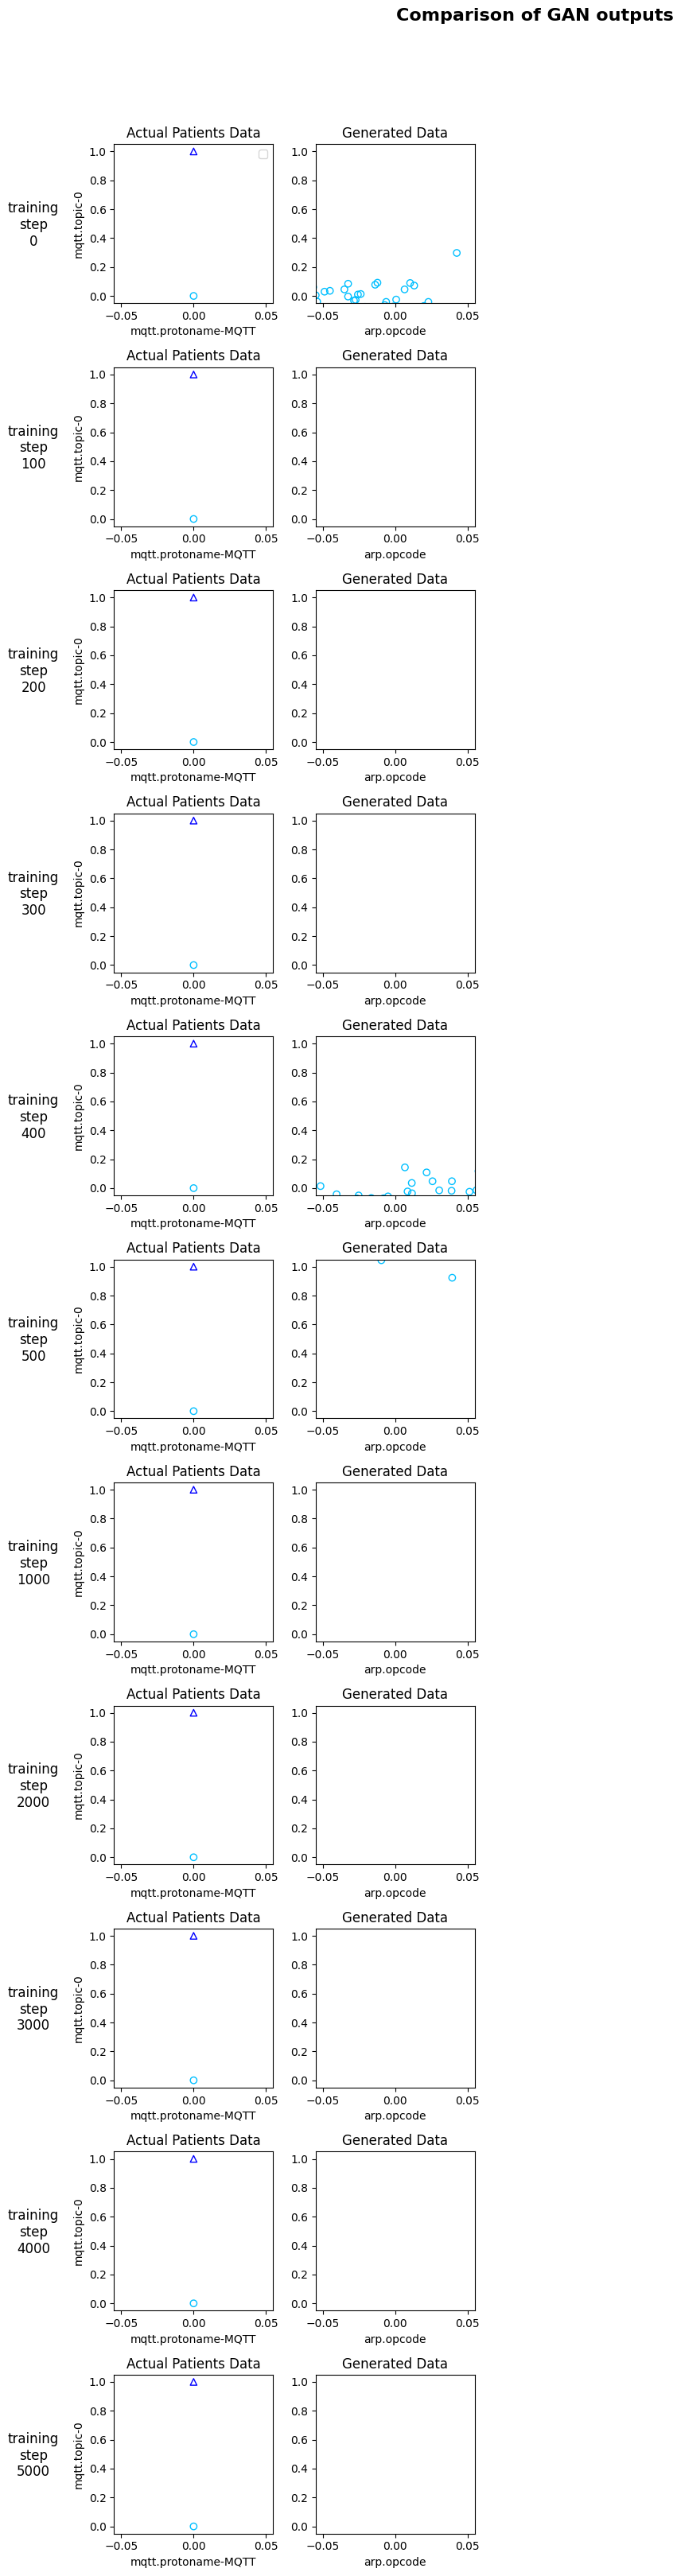

In [ ]:
import matplotlib.pyplot as plt

# Setup parameters visualization parameters
seed = 17
test_size = 492 # number of fraud cases
noise_dim = 32

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols)

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)

    for group, color, marker in zip(real_samples.groupby(col_group_by), colors, markers):
        plt.scatter( group[1][[col1]], group[1][[col2]], marker=marker, edgecolors=color, facecolors='none' )

    plt.title('Actual Patients Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()

    if model_step_ix == 0:
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')

    i=0
    [model_name, with_class, generator_model] = models['GAN']

    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

    ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

    g_z = generator_model.predict(z)

    gen_samples = pd.DataFrame(g_z, columns=data_cols)
    gen_samples.to_csv('Generated_sample.csv')
    plt.scatter( gen_samples[[col1]], gen_samples[[col2]], marker=markers[0], edgecolors=colors[0], facecolors='none' )
    plt.title("Generated Data")
    plt.xlabel(data_cols[0])
    ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

plt.savefig('Comparison_of_GAN_outputs.png')

In [ ]:
g_z=pw.inverse_transform(g_z)
gen_samples = pd.DataFrame(g_z, columns=data_cols)
gen_samples.to_csv('Generated_sample.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


AttributeError: ignored

Now let's try to do a feature by feature comparision between the generated data and the actual data. We will use python's `table_evaluator` library to compare the features.

In [ ]:
!pip install table_evaluator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 37.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


In [ ]:
gen_samples.drop('Unnamed: 0', axis=1, inplace=True)
print(gen_df.columns)
print(df.shape, gen_df.shape)

KeyError: ignored

We call the `visual_evaluation` method to compare the actual date(`df`) and the generated data(`gen_df`).

1909671 492


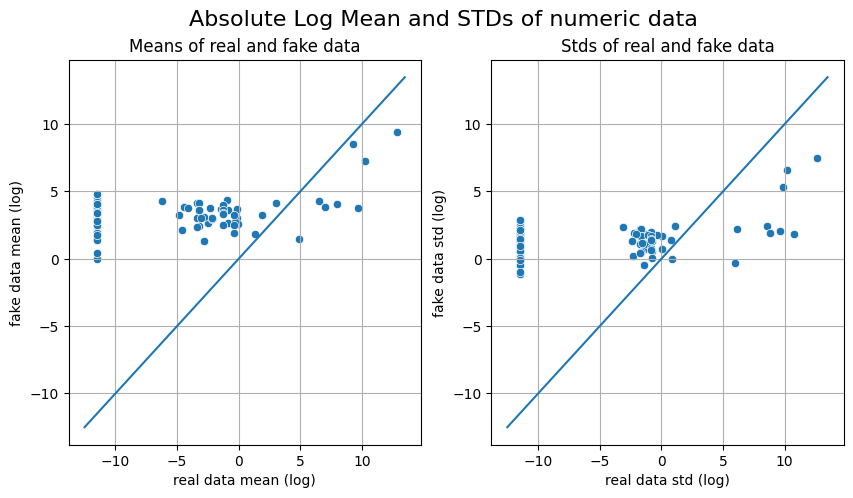

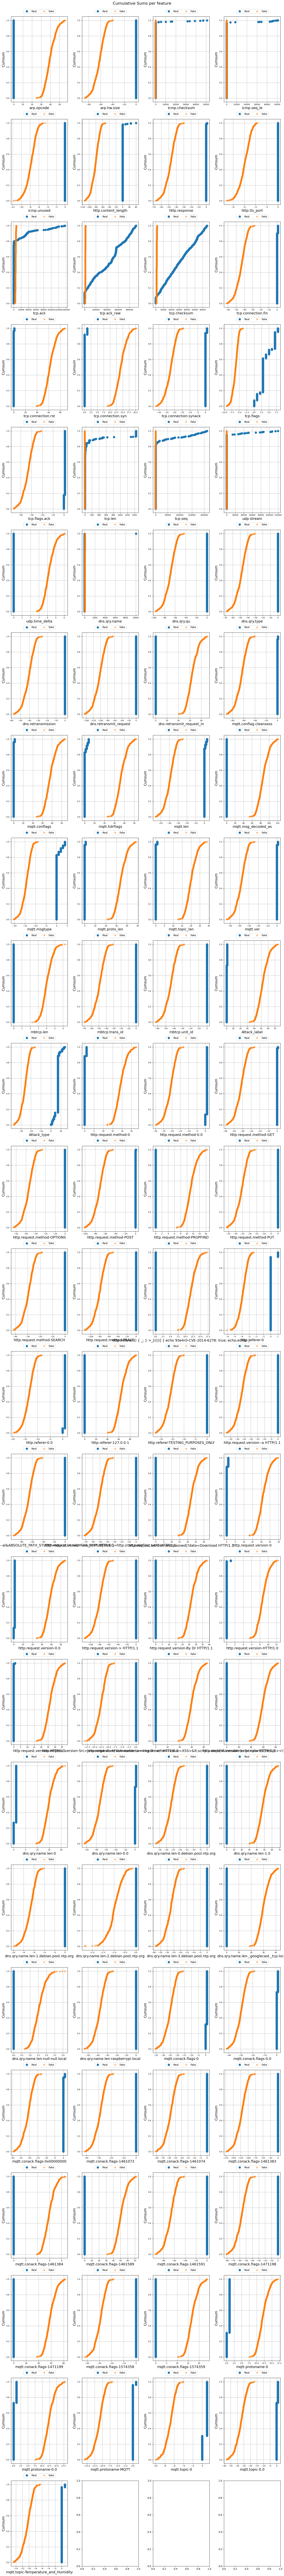

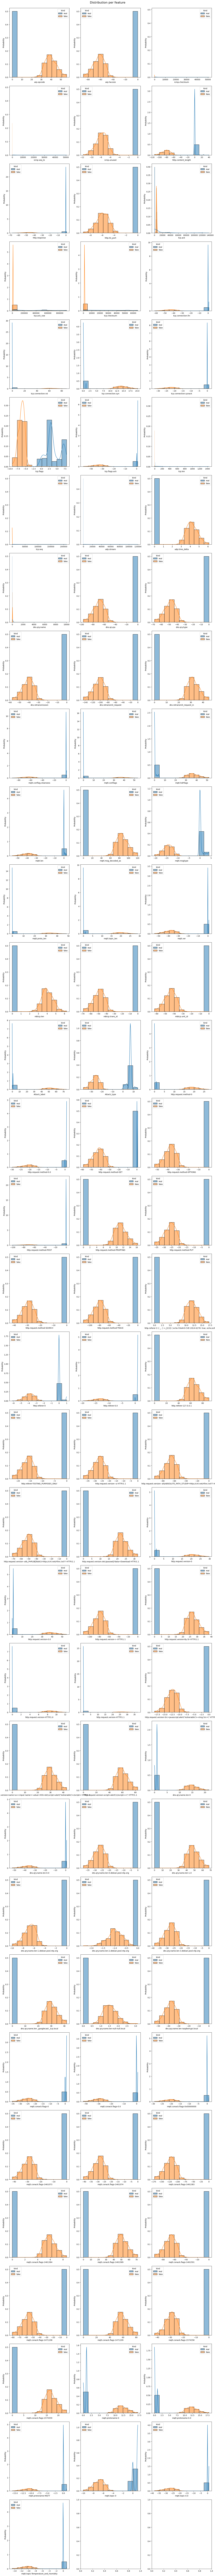

/usr/local/lib/python3.10/dist-packages/table_evaluator/viz.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


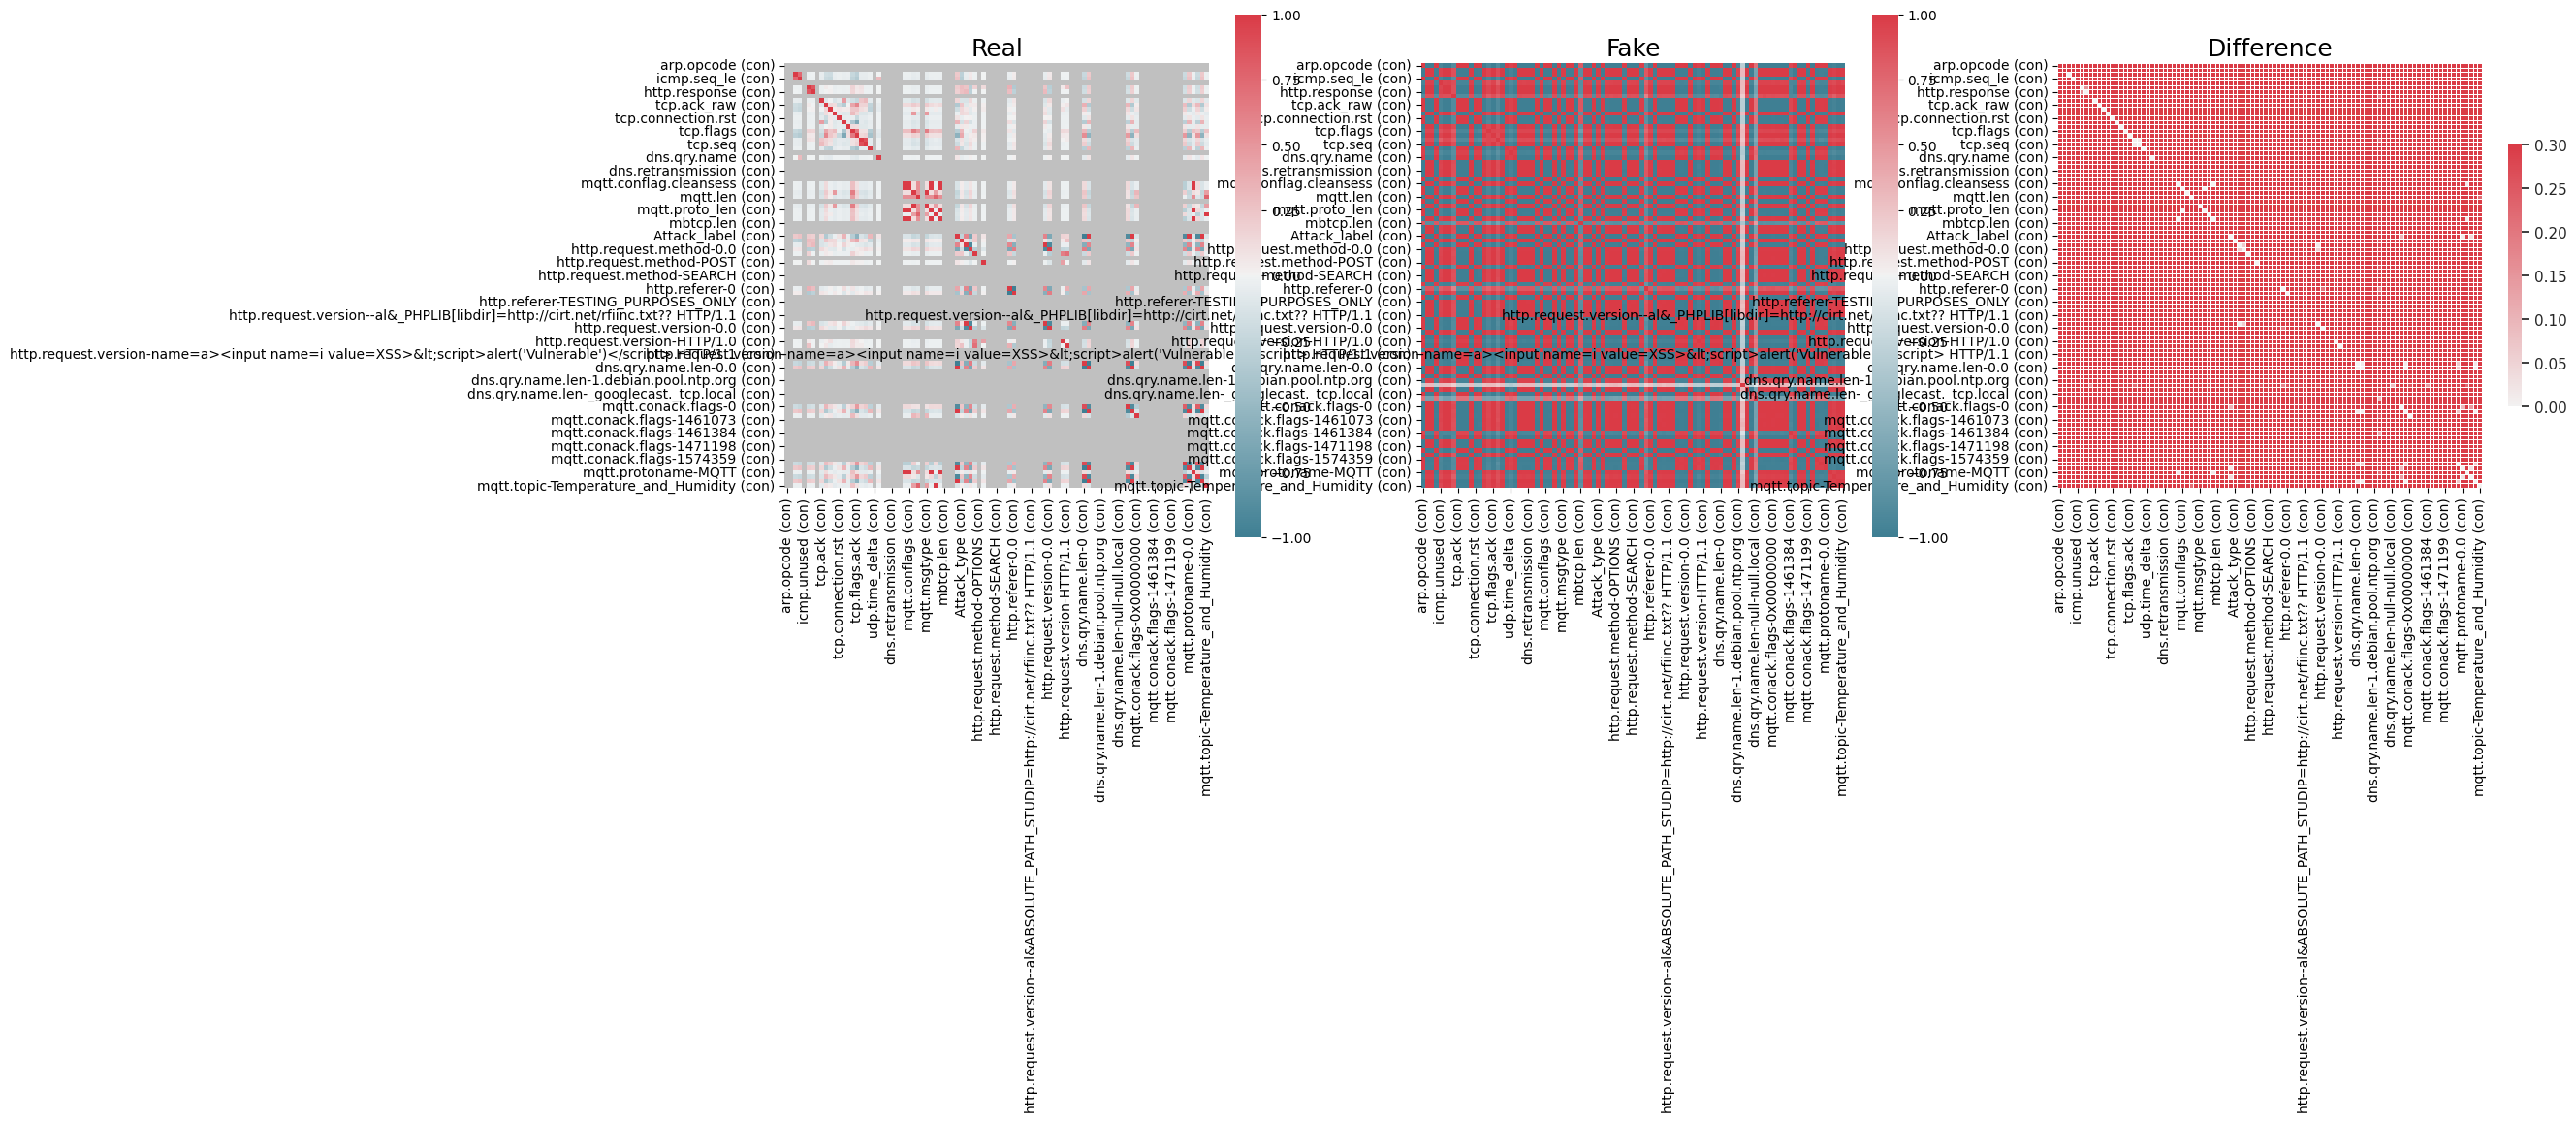

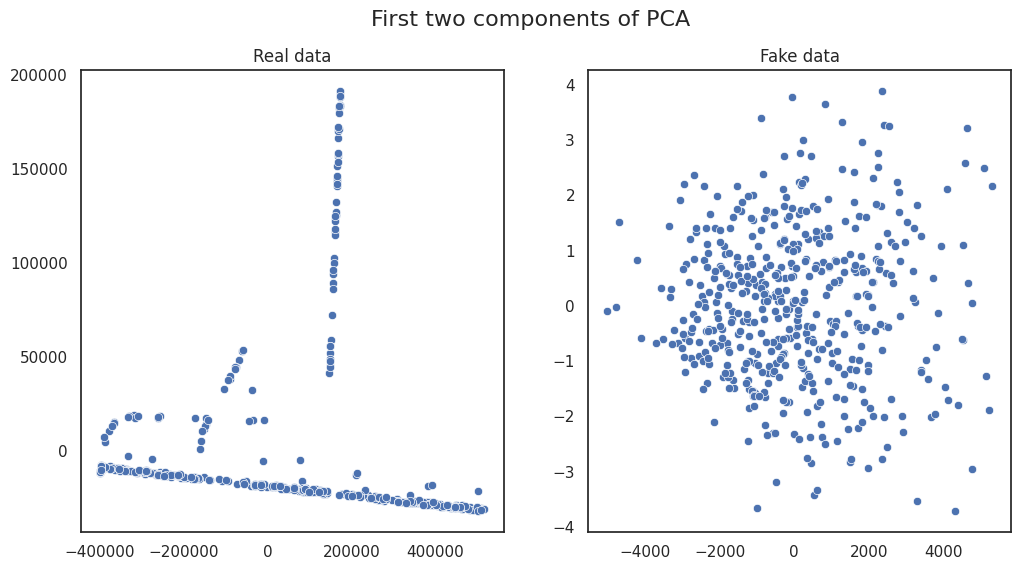

In [ ]:
from table_evaluator import load_data, TableEvaluator

print(len(df), len(gen_samples))
table_evaluator =  TableEvaluator(df, gen_samples)

table_evaluator.visual_evaluation()

 ## Conclusion

Some of the features in the syntehtic data match closely with actual data but there are some other features which were not learnt perfectly by the model. We can keep playing with the model and its hyperparameters to improve the model further.

This post demonstrates that its fairly simply to use GANs to generate synthetic data where the actual data is sensitive in nature and can't be shared publicly.